# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



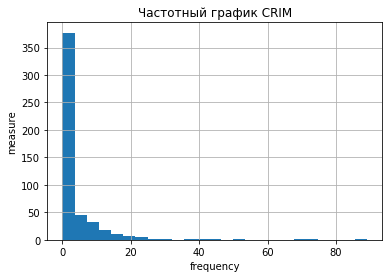

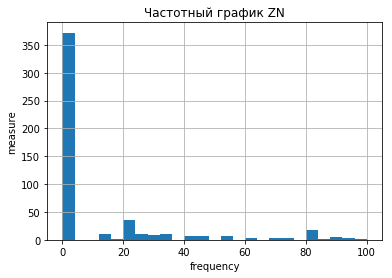

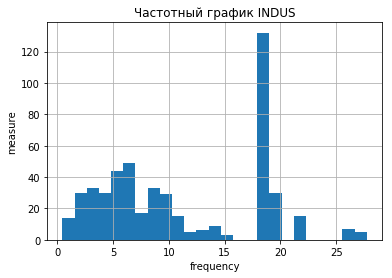

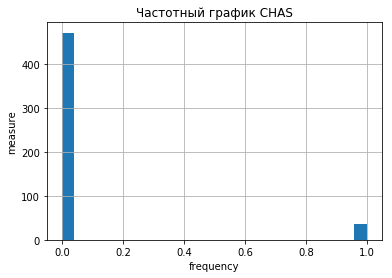

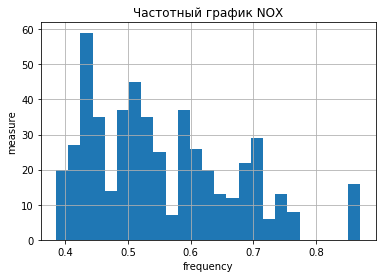

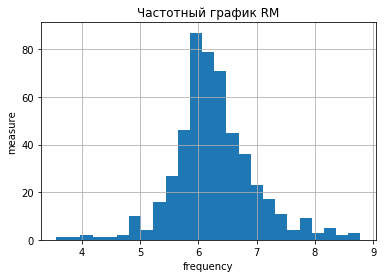

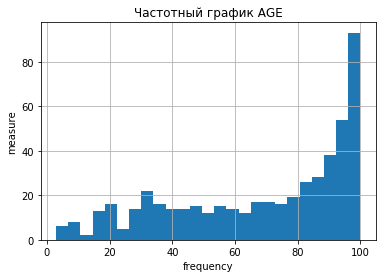

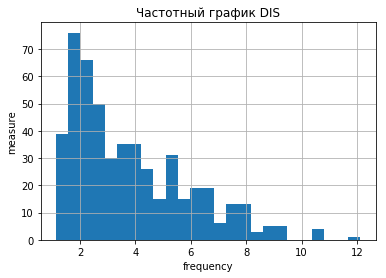

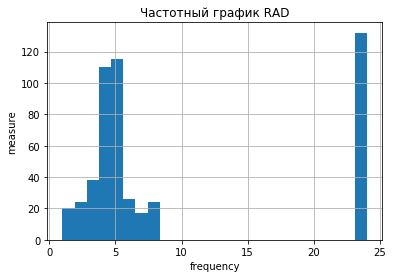

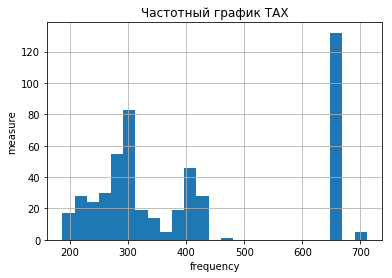

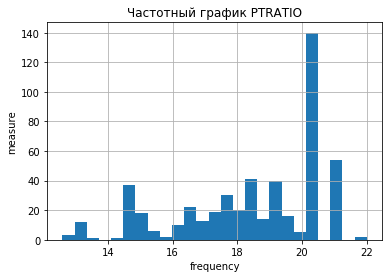

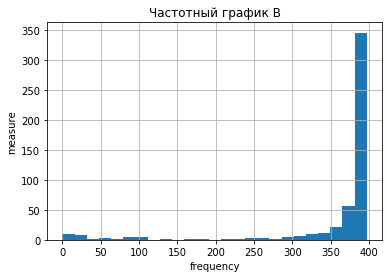

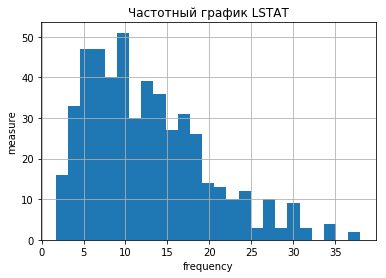

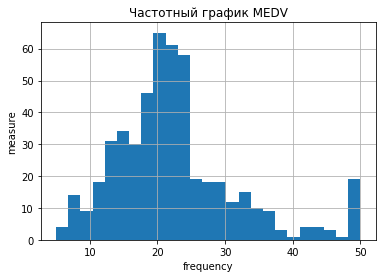

In [8]:
for i in range(14):

    n, bins, patches = plt.hist(data.iloc[:,i], bins=25)

    plt.xlabel('frequency')
    plt.ylabel('measure')
    plt.title(f'Частотный график {data.iloc[:,i].name}')
    plt.grid(True)
    plt.show()



CRIM - это геомерическое распределение

CHAS - это распределение Бернулли

NOX - Биноминальное распределение

RM - Нормальное распределение

AGE - Геометрическое распределение

DIS - Геометрическое распределение

RAD - с большой натяжкой распределение Бернулли

B - Лонгнормальное распределение

LAST - Биноминальное распределение

MEDV - Биноминальное распределение

In [10]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


c:\program files\python37\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\program files\python37\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


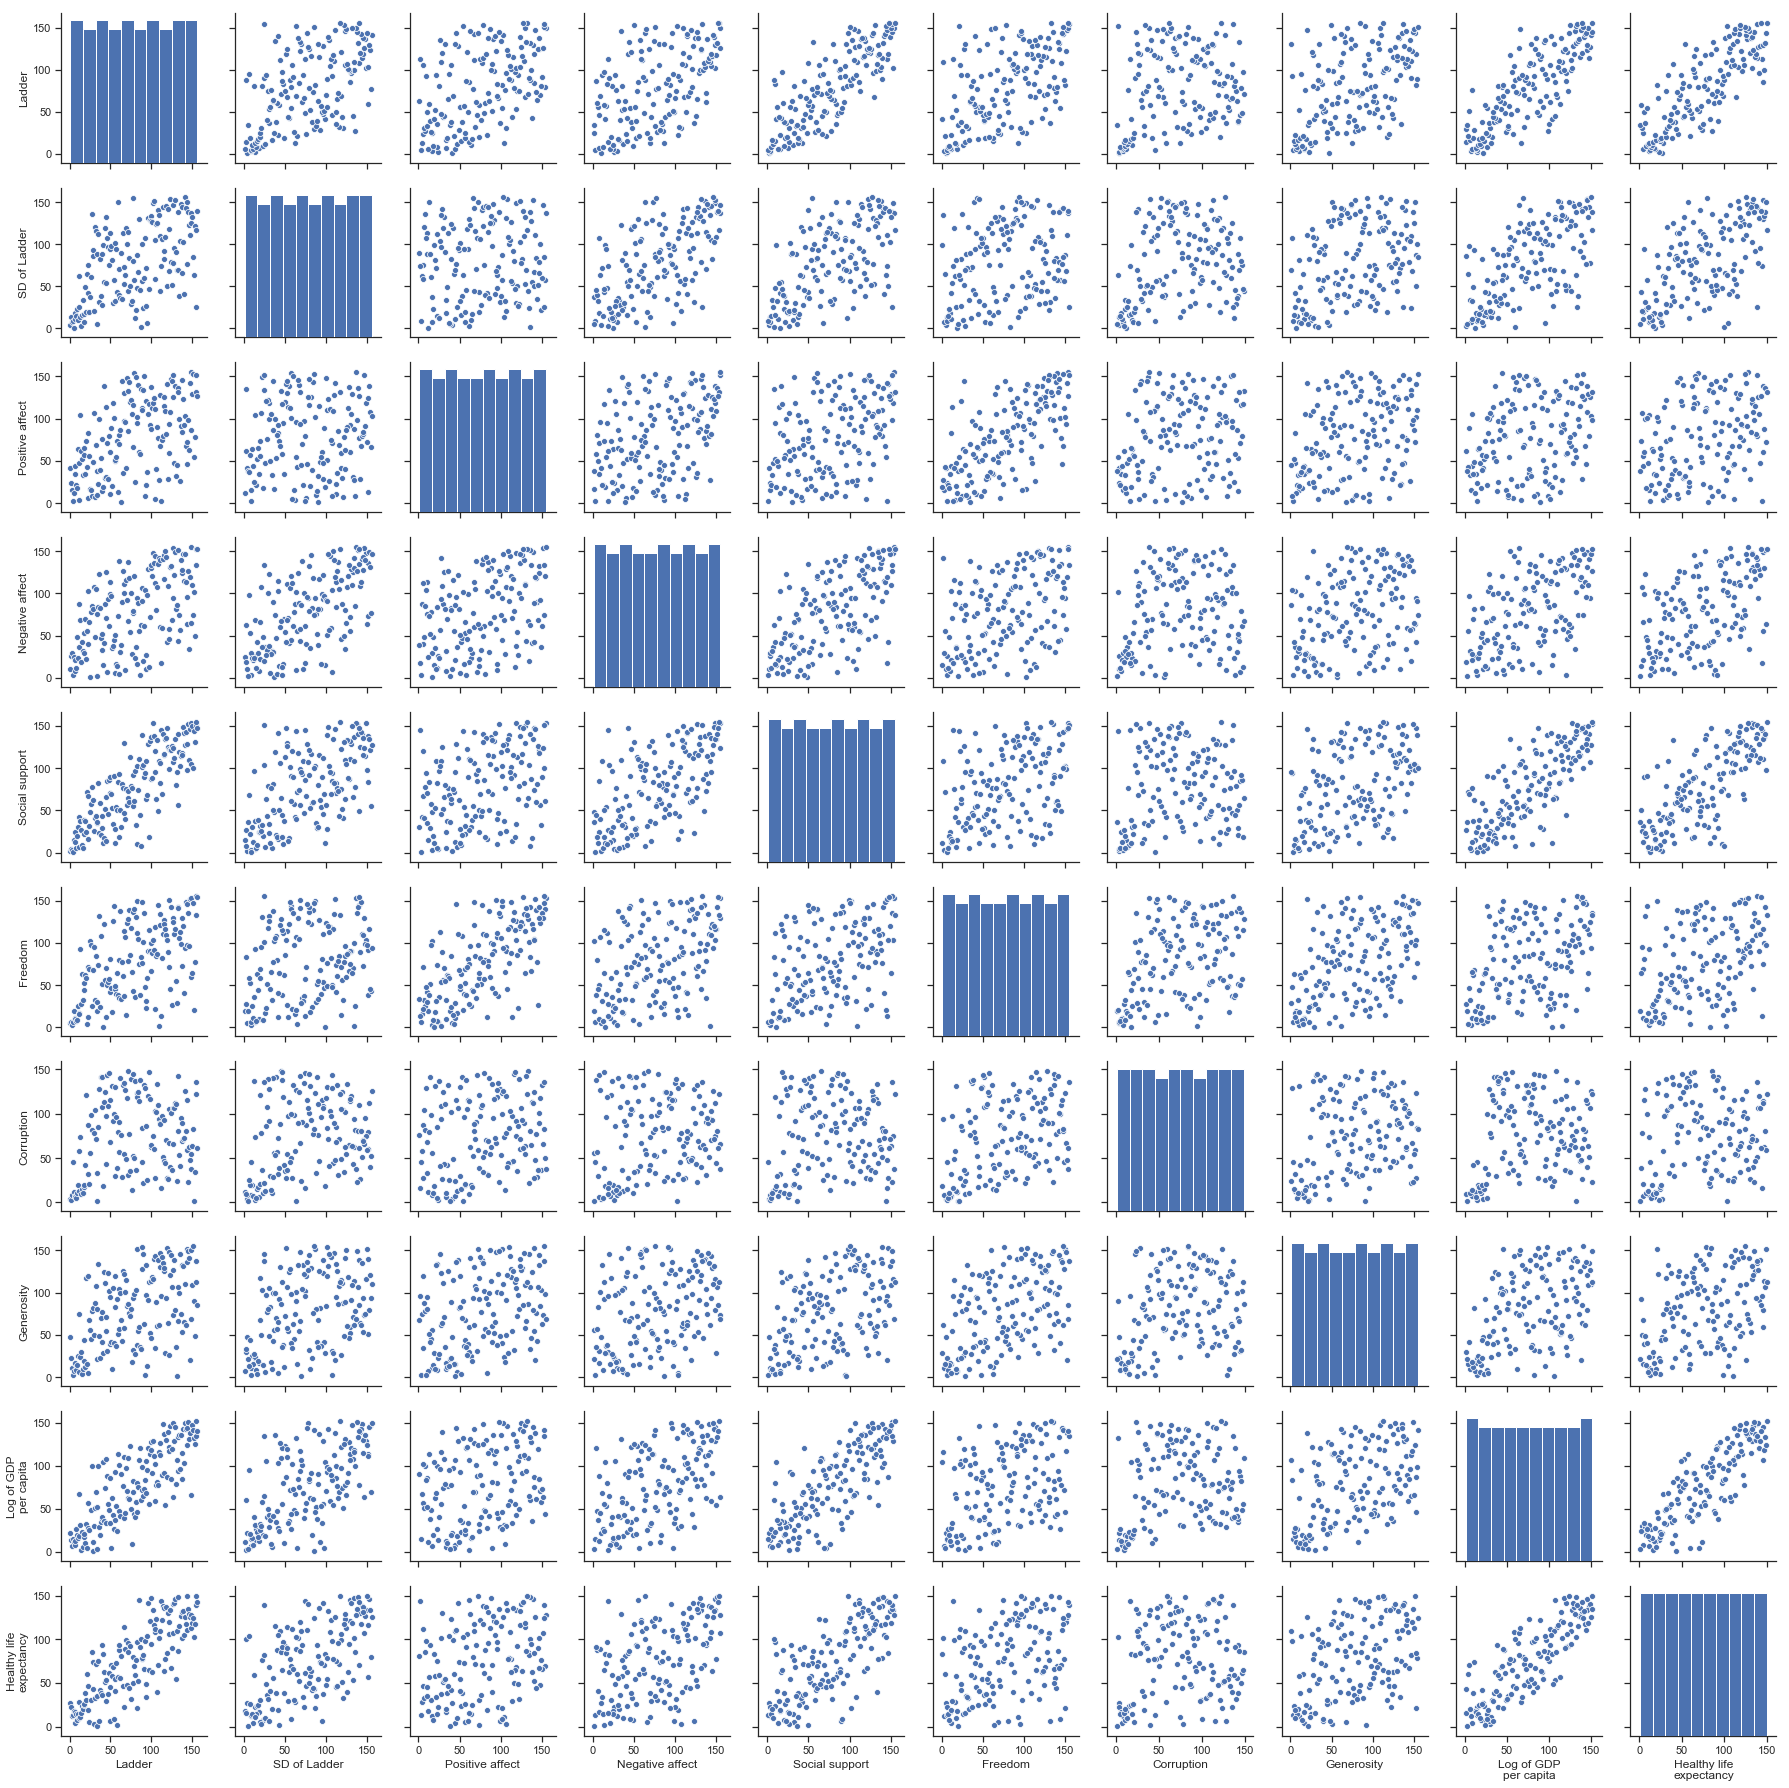

In [36]:
sns.pairplot(df)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [57]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data1 = data[data.isna().any(axis=1)]

data_clean = data.drop(data1.index)

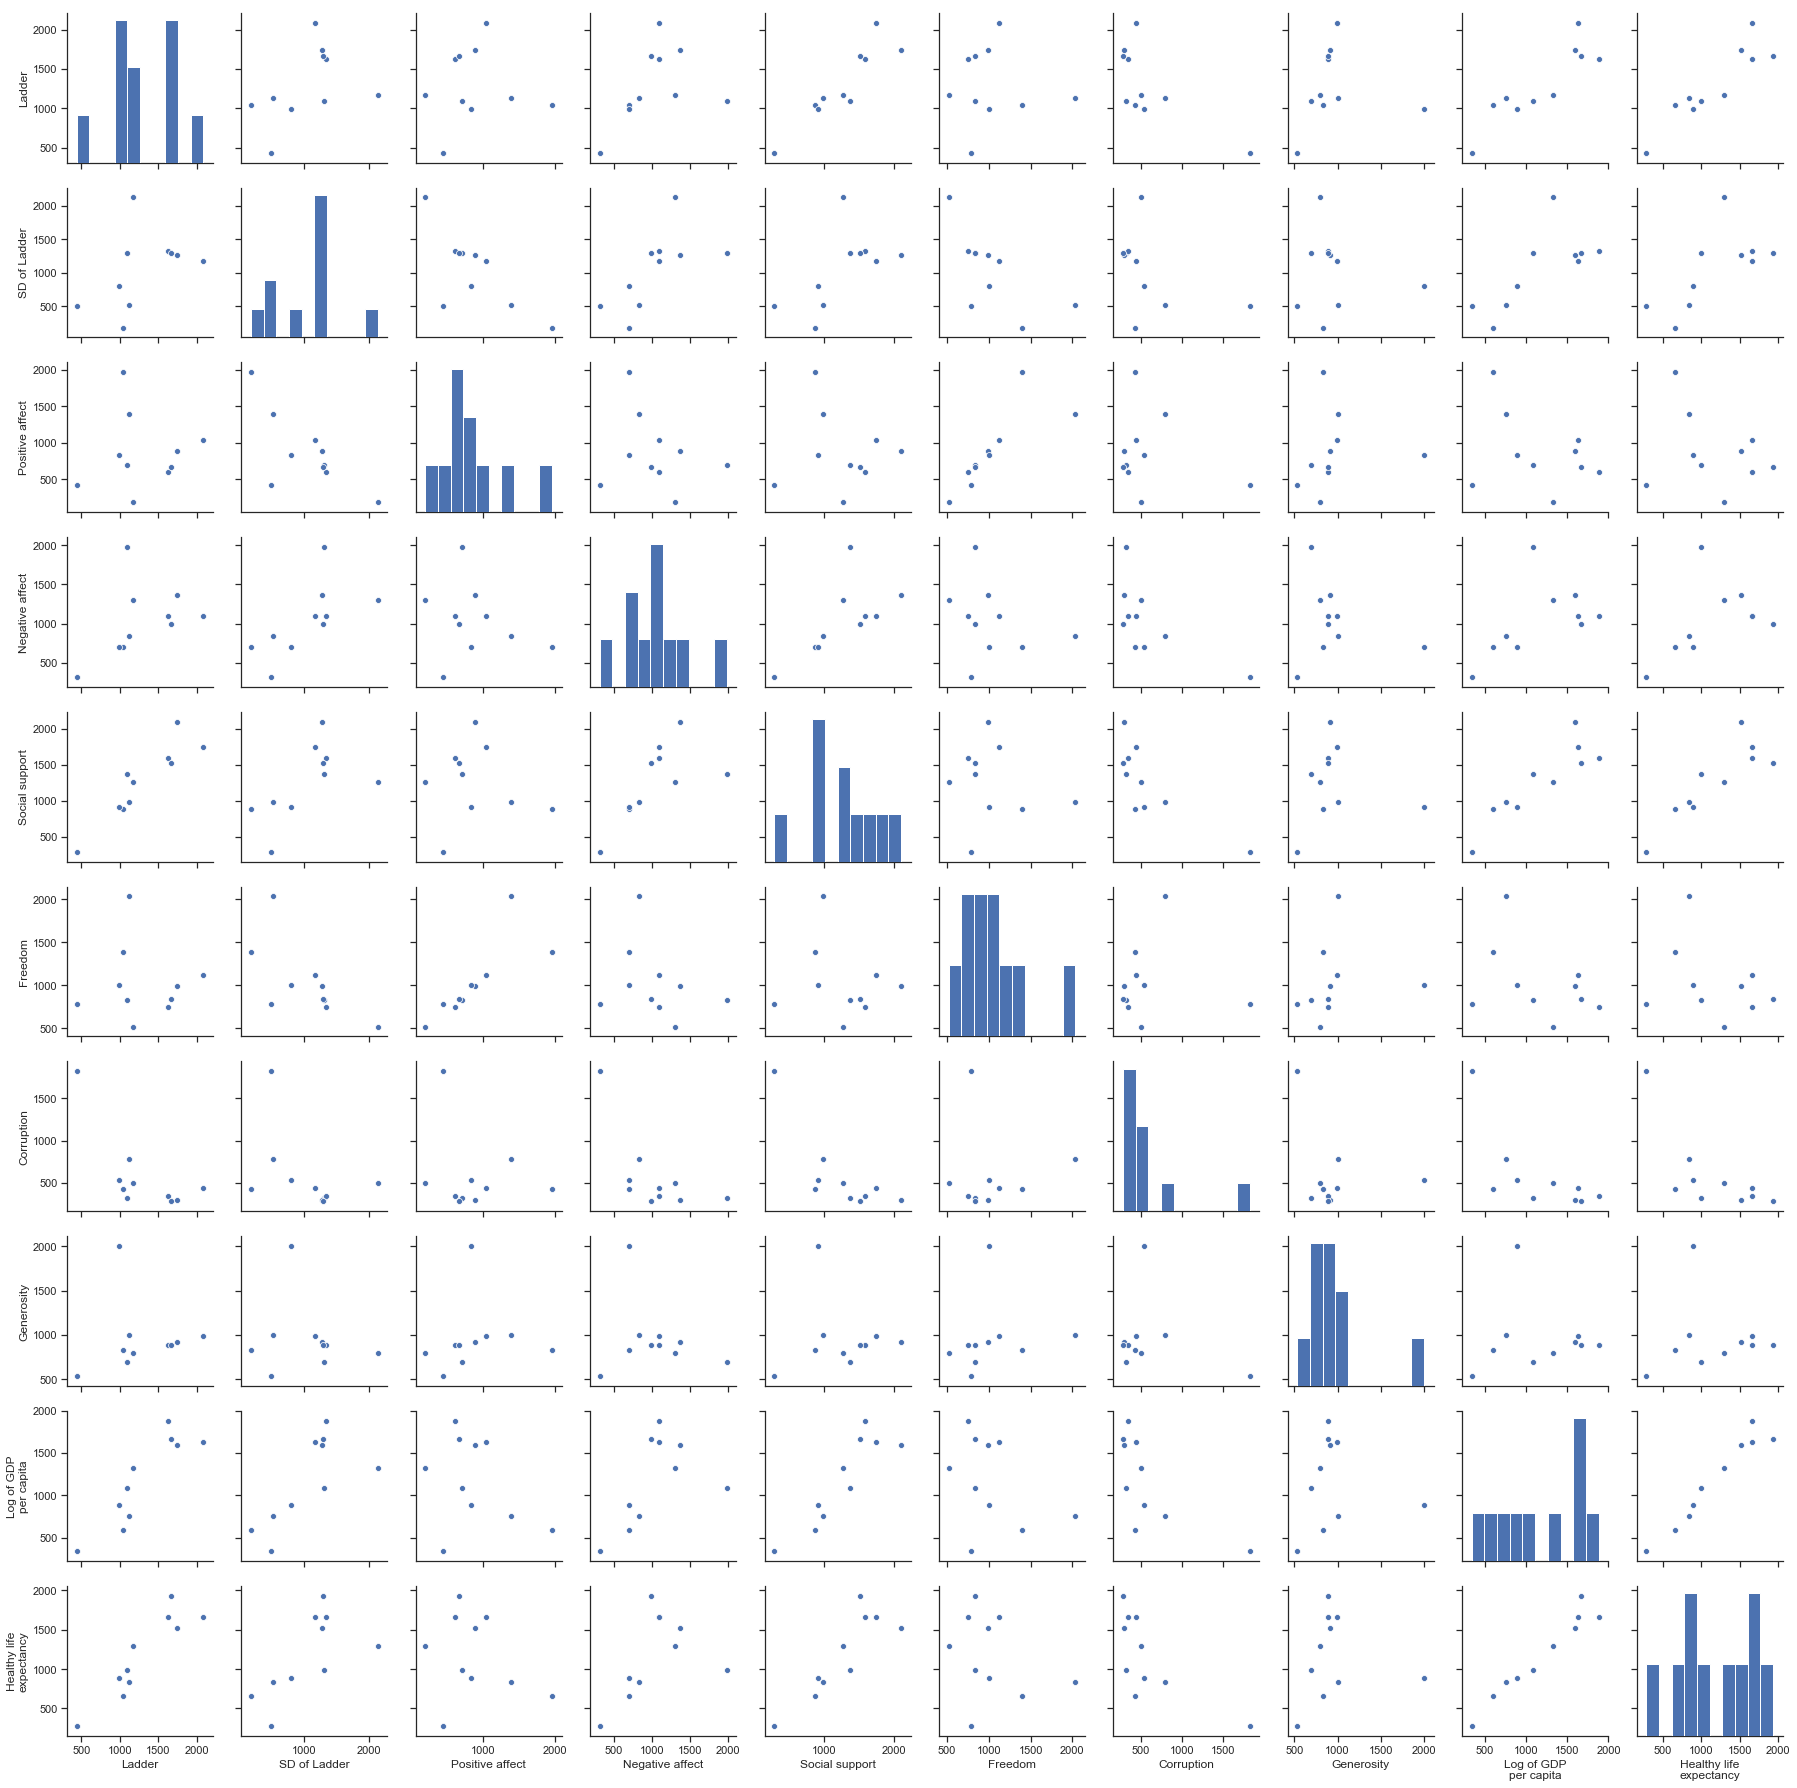

In [70]:
data_cov = data_clean.cov()
sns.pairplot(data_cov)

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

**Ответ: в таблице 16 отсутствующих значений**


Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [62]:
count = data_clean['Country (region)'].count()
print(f'Стран в выборке: {count}')

Стран в выборке: 140


**Ответ: данные значения - это не проблема классификации, так как колличество категорий (стран) совпадает с количество рядов в выборке**

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

ValueError: `dataset` input should have multiple elements.

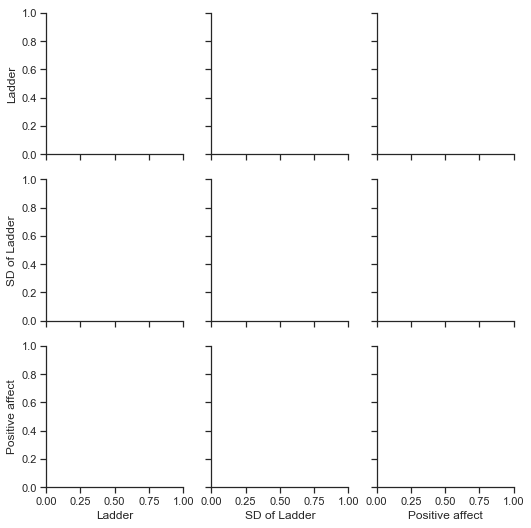

In [66]:
sns.set(style="ticks", color_codes=True)
cov_plot = sns.pairplot(data=data_clean.iloc[:, :4], hue='Country (region)')
plt.show()

# для очищенных данных не строит, так как для каждой страны есть только одно значение
# для матрицы ковариаций не строит, потому что в матрице нет признака страна

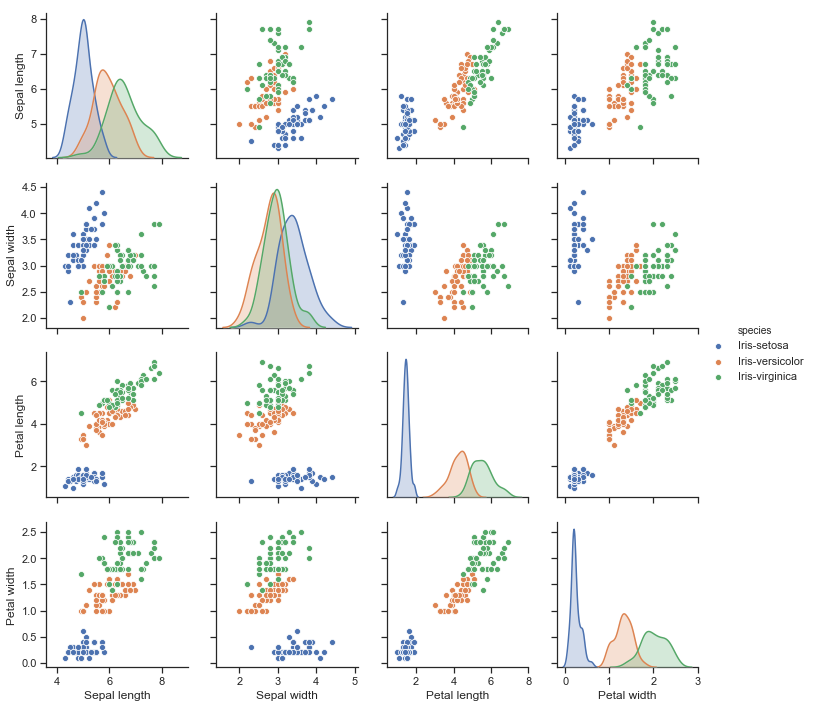

In [69]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names=["Sepal length", "Sepal width", "Petal length", "Petal width", 'species'])

sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, hue='species')
plt.show()

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


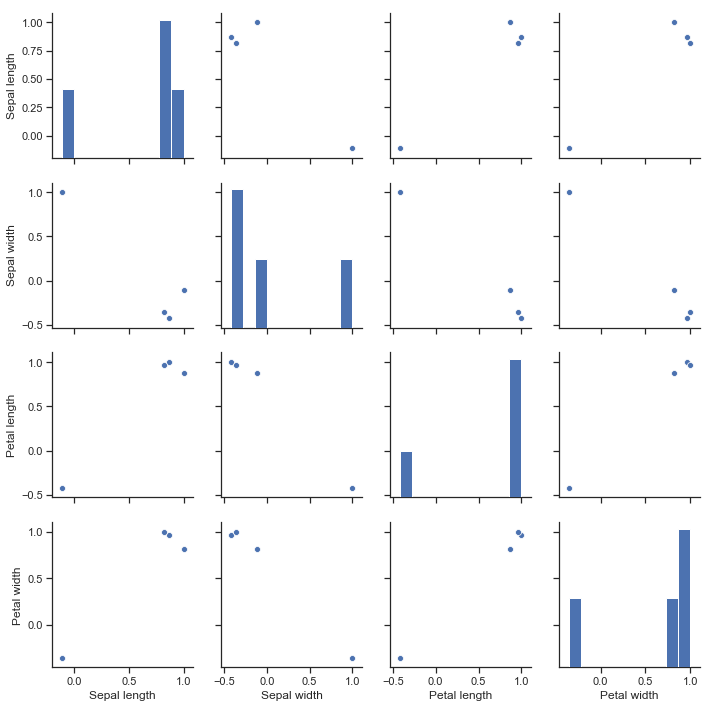

In [75]:
corr = data.corr()

sns.pairplot(corr)
corr

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

(array([1., 3., 1., 1., 1., 3.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

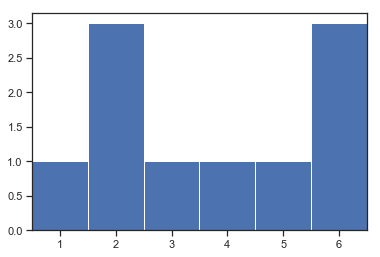

In [100]:
rng = np.random.RandomState(123)
roll = []

for i in range(10):
    roll.append(rng.randint(0, 7))

plt.xlim(0.5, 6.5)
plt.hist(roll, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])

# это равномерное распределение

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

(array([152., 126., 149., 121., 149., 162.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 6 Patch objects>)

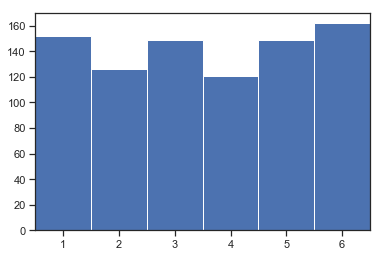

In [106]:
rng = np.random.RandomState(123)
roll = []

for i in range(1000):
    roll.append(rng.randint(0, 7))

plt.xlim(0.5, 6.5)
plt.hist(roll, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])

# это равномерное распределение, график особо не изменился